In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ranksums

In [2]:
[predictions_list, labels_all_deg_seed, labels_all_simba_seed, labels_all_simba_seed2] = \
    np.load('../temp/predictions_20seeds.npy', allow_pickle=True)

In [3]:
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

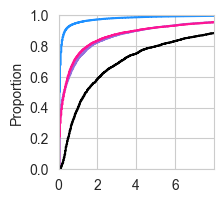

In [117]:
s = 1
framerate = 30
max_dur = 8
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

# get change in labels
behav_start_simba = np.where(np.diff(labels_all_simba_seed2[s]) != 0)[0]
behav_start_deg = np.where(np.diff(labels_all_deg_seed[s]) != 0)[0]
behav_start_asoid = np.where(np.diff(predictions_list[-1][s]) != 0)[0]
behav_start_annot = np.where(np.diff(targets_test) != 0)[0]

# plot empirical cdfs of duration (left is short, right is long)
sns.ecdfplot(np.diff(behav_start_simba),
             color='dodgerblue',
             ax=ax)
sns.ecdfplot(np.diff(behav_start_deg),
             color='mediumpurple',
             ax=ax)
sns.ecdfplot(np.diff(behav_start_asoid),
             color='deeppink',
             ax=ax)
sns.ecdfplot(np.diff(behav_start_annot),
             color='k',
             ax=ax)

ax.set_xlim([0, framerate*max_dur])
ax.set_xticks(np.arange(0, framerate*max_dur, framerate*2))
ax.set_xticklabels(np.arange(0, max_dur, 2))
plt.show()
fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/prediction_duration_ecdf.svg')


In [67]:
# get behavior label that started
starting_behav_simba = labels_all_simba_seed2[s][behav_start_simba+1]
starting_behav_deg = labels_all_deg_seed[s][behav_start_deg+1]
starting_behav_asoid = predictions_list[-1][s][behav_start_asoid+1]

# get behavior duration
behav_dur_simba = np.diff(np.hstack([0, behav_start_simba]))
behav_dur_deg = np.diff(np.hstack([0, behav_start_deg]))
behav_dur_asoid = np.diff(np.hstack([0, behav_start_asoid]))

# starting_behav_simba.shape, behav_dur_simba.shape
behav_duration_dict_nosimba = {'algo': np.hstack([
                                          np.repeat(['DEG'],
                                                    len(starting_behav_deg[(behav_dur_deg<
                                                                           np.percentile(behav_dur_deg, 95)) &
                                                                           (behav_dur_deg>
                                                                           np.percentile(behav_dur_deg, 5))
                                                        ])),
                                          np.repeat(['A-SOiD'],
                                                    len(starting_behav_asoid[(behav_dur_asoid<
                                                                              np.percentile(behav_dur_asoid, 95)) &
                                                                             (behav_dur_asoid>
                                                                              np.percentile(behav_dur_asoid, 5))
                                                        ]))]),
                       'behavior': np.hstack([
                                              starting_behav_deg[(behav_dur_deg<
                                                                  np.percentile(behav_dur_deg, 95)) &
                                                                 (behav_dur_deg>
                                                                  np.percentile(behav_dur_deg, 5))
                                                        ],
                                              starting_behav_asoid[(behav_dur_asoid<
                                                                   np.percentile(behav_dur_asoid, 95)) &
                                                                   (behav_dur_asoid>
                                                                   np.percentile(behav_dur_asoid, 5))
                                              ]]),
                       'duration': np.hstack([
                                              behav_dur_deg[(behav_dur_deg<
                                                             np.percentile(behav_dur_deg, 95)) &
                                                            (behav_dur_deg>
                                                             np.percentile(behav_dur_deg, 5))
                                                        ],
                                              behav_dur_asoid[(behav_dur_asoid<
                                                               np.percentile(behav_dur_asoid, 95)) &
                                                              (behav_dur_asoid>
                                                               np.percentile(behav_dur_asoid, 5))
                                              ]]),
                       }
behav_duration_df_nosimba = pd.DataFrame(data=behav_duration_dict_nosimba)

# starting_behav_simba.shape, behav_dur_simba.shape
behav_duration_dict = {'algo': np.hstack([np.repeat(['SimBA'], len(starting_behav_simba)),
                                          np.repeat(['DEG'], len(starting_behav_deg)),
                                          np.repeat(['A-SOiD'], len(starting_behav_asoid))]),
                       'behavior': np.hstack([starting_behav_simba,
                                              starting_behav_deg,
                                              starting_behav_asoid]),
                       'duration': np.hstack([behav_dur_simba,
                                              behav_dur_deg,
                                              behav_dur_asoid]),
                       }
behav_duration_df = pd.DataFrame(data=behav_duration_dict)


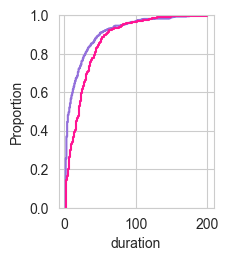

In [89]:
s = 1
behav_of_interest = 2
framerate = 30
max_dur = 3
fig, ax = plt.subplots(1, 1, figsize=(2, 2.5))

# get change in labels
behav_start_simba = np.where(np.diff(labels_all_simba_seed2[s]) != 0)[0]
behav_start_deg = np.where(np.diff(labels_all_deg_seed[s]) != 0)[0]
behav_start_asoid = np.where(np.diff(predictions_list[-1][s]) != 0)[0]
behav_start_annot = np.where(np.diff(targets_test) != 0)[0]

# plot empirical cdfs of duration (left is short, right is long)
sns.ecdfplot(behav_duration_df_nosimba[
                 (behav_duration_df_nosimba['algo']=='DEG') &
                 (behav_duration_df_nosimba['behavior']==behav_of_interest)]['duration'],
             color='mediumpurple',
             ax=ax)
sns.ecdfplot(behav_duration_df_nosimba[
                 (behav_duration_df_nosimba['algo']=='A-SOiD') &
                 (behav_duration_df_nosimba['behavior']==behav_of_interest)]['duration'],
             color='deeppink',
             ax=ax)
# sns.ecdfplot(np.diff(behav_start_deg),
#              color='mediumpurple',
#              ax=ax)
# sns.ecdfplot(np.diff(behav_start_asoid),
#              color='deeppink',
#              ax=ax)
# sns.ecdfplot(np.diff(behav_start_annot),
#              color='k',
#              ax=ax)

# ax.set_xlim([0, framerate*max_dur])
# ax.set_xticks(np.arange(0, framerate*max_dur, framerate*2))
# ax.set_xticklabels(np.arange(0, max_dur, 2))
plt.show()



In [86]:
behav_duration_df_nosimba[
                 (behav_duration_df_nosimba['algo']=='A-SOiD') &
                 (behav_duration_df_nosimba['behavior']==0)]

,algo,behavior,duration
4045,A-SOiD,0,57
4161,A-SOiD,0,20
4179,A-SOiD,0,17
4446,A-SOiD,0,21
4482,A-SOiD,0,62
...,...,...,...
8068,A-SOiD,0,41
8104,A-SOiD,0,61
8106,A-SOiD,0,36
8119,A-SOiD,0,45


In [113]:
# stats.kstest(behav_dur_simba, behav_dur_deg, method='exact')
# stats.kstest(behav_dur_asoid, behav_dur_deg, method='exact')
# stats.ttest_ind(behav_dur_asoid, behav_dur_deg)
ranksums(behav_dur_asoid, behav_dur_deg)

RanksumsResult(statistic=0.6470980438889995, pvalue=0.5175684912257692)

In [108]:
behav_of_interest = 2
# stats.ks_2samp(sample1, sample2)
# stats.ttest_ind(rvs1, rvs2)
stats.ttest_ind(behav_duration_df_nosimba[
                 (behav_duration_df_nosimba['algo']=='DEG') &
                 (behav_duration_df_nosimba['behavior']==behav_of_interest)]['duration'],
             behav_duration_df_nosimba[
                 (behav_duration_df_nosimba['algo']=='A-SOiD') &
                 (behav_duration_df_nosimba['behavior']==behav_of_interest)]['duration'],
            )

Ttest_indResult(statistic=-4.089421027086083, pvalue=4.701793546606184e-05)

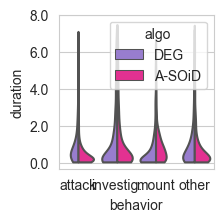

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
sns.violinplot(data=behav_duration_df_nosimba,
               cut=0,
               x='behavior',
               y='duration',
               hue='algo',
               split=True,
               inner=None,
               palette=['mediumpurple', 'deeppink'], ax=ax)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['attack', 'investig.', 'mount', 'other'])
ax.set_yticks(np.arange(0, 240.1, 60))
ax.set_yticklabels(np.arange(0, 8.1, 2))

plt.show()
fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/deg_asoid_durations.svg')